In [105]:
import sys
sys.path.append('..')
import time
from astropy.table import Table
import pyfits as fits
import numpy as np
import matplotlib.pyplot as plt
from os.path import expanduser
from deeplens.resnet_classifier import deeplens_classifier

from deeplens.utils.blfchallenge import classify_ground_challenge 

from sklearn import metrics

home = expanduser("~")


imgs = 240

# Path to the downloaded files
# download_path=home+'/Desktop/' # To be adjusted on your machine
download_path='//Volumes/CJSTORFER/' # To be adjusted on your machine



# Path to export the data
export_path=home+'/Desktop/'   # To be adjusted on your machine


#Loads x, y dataset that belong to the previously trained CNN

d = Table.read(export_path+'catalogs_'+str(imgs)+'_RGB.hdf5', path='/ground')  

x = np.asarray(d['image']).reshape((-1,3,101,101))
print x.shape

y = np.asarray(d['is_lens']).reshape((-1,1))
print y.shape




# x = np.asarray(d['image'])[0:120,:,:,:].reshape((-1,3,101,101))
# print x.shape

# y = np.asarray(d['is_lens'])[0:120,].reshape((-1,1))
# print y.shape


# x_additional = np.asarray(d['image'])[120:500,:,:,:].reshape((-1,3,101,101))
# y_additional = np.asarray(d['is_lens'])[120:500,].reshape((-1,1))

# x_nonlens = np.zeros((0,3,101,101))
# for a, b in zip(x_additional, y_additional):
#     if b==0:
#         print b
#         print a.shape
#         print x_nonlens.shape
#         print b.shape
#         x_nonlens = np.concatenate((x_nonlens,a.reshape(1,3,101,101)),axis = 0)

        
# x_nonlens = x_nonlens[0:120]
# y_nonlens = np.zeros((120,))

# x = np.concatenate((x, x_nonlens))
# y = np.concatenate((y.reshape(120,), y_nonlens)).reshape(240,1)



# Clipping and scaling parameters applied to the data as preprocessing
vmin=-1e-9
vmax=1e-9
scale=100

mask = np.where(x == 100)

x[mask] = 0

# Simple clipping and rescaling the images
x = np.clip(x, vmin, vmax)/vmax * scale

x[mask] = 0

print 'Lens(1): '+ str(np.sum(y==1))
print 'Non-lens(0): '+ str(np.sum(y==0))



(240, 3, 101, 101)
(240, 1)
Lens(1): 104
Non-lens(0): 136


In [106]:
model = deeplens_classifier()
model.load('/Users/Chris/CMUDeepLens/Trained_Sets/240imgs_120epochs_RGB/deeplens_params_final.npy', x, y)

loading from /Users/Chris/CMUDeepLens/Trained_Sets/240imgs_120epochs_RGB/deeplens_params_final.npy...
Model loaded


In [107]:
test_img = fits.getdata('/Users/Chris/Desktop/cutout_18.2524_2.8462.fits')

In [108]:
test_img = test_img.reshape(1,3,101,101)

In [109]:
print test_img.shape
print test_img.max()
print x.shape

(1, 3, 101, 101)
0.330457
(240, 3, 101, 101)


In [110]:
vmin=-1e-9
vmax=1e-9
scale=30

mask = np.where(test_img == 100)

test_img[mask] = 0


test_img *= 25

# test_img = np.clip(test_img, vmin, vmax)/vmax * scale


test_img[mask] = 0

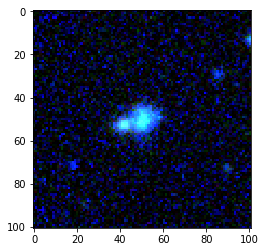

9.27819140961


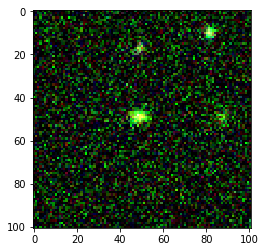

In [111]:
plt.imshow(test_img[0].T)
plt.show()
plt.imshow(x[1].T)
print x[0].max()
plt.show()

In [112]:
p = model.predict_proba(test_img)

In [113]:
print(p)

[[ 0.92762691]]


In [114]:
test_img_0 = fits.getdata('/Users/Chris/Desktop/cutout_188.5220_2.1137.fits')

In [115]:
test_img_0 = test_img.reshape(1,3,101,101)

In [116]:
vmin=-1e-9
vmax=1e-9
scale=30

mask = np.where(test_img_0 == 100)

test_img_0[mask] = 0


test_img_0 *= 25 

# test_img = np.clip(test_img, vmin, vmax)/vmax * scale


test_img_0[mask] = 0

In [117]:
p = model.predict_proba(test_img_0)

In [118]:
print(p)

[[ 0.52887124]]
